In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'dataset'
skip_rows = 0
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        if line.strip() == '@DATA':
            skip_rows = i + 1
            break

In [4]:
df = pd.read_csv('dataset', skiprows=skip_rows, header=None)

In [5]:
column_names = [
    'surname', 'creditscore', 'age', 'tenure', 'balance', 'numofproducts',
    'hascrcard', 'isactivemember', 'estimatedsalary', 'exited',
    'surname_tfidf_0', 'surname_tfidf_1', 'surname_tfidf_2', 'surname_tfidf_3',
    'surname_tfidf_4', 'france', 'germany', 'spain', 'female', 'male',
    'mem_no_products', 'cred_bal_sal', 'bal_sal', 'tenure_age',
    'age_tenure_product'
]

In [7]:
df.columns = column_names

print(df.head())

   surname  creditscore   age  tenure    balance  numofproducts  hascrcard  \
0     2023        668.0  33.0     3.0       0.00            2.0          1   
1     2024        627.0  33.0     1.0       0.00            2.0          1   
2     1236        678.0  40.0    10.0       0.00            2.0          1   
3     1362        581.0  34.0     2.0  148882.54            1.0          1   
4      491        716.0  33.0     5.0       0.00            2.0          1   

   isactivemember  estimatedsalary  exited  ...  france  germany  spain  \
0               0        181449.97       0  ...       1        0      0   
1               1         49503.50       0  ...       1        0      0   
2               0        184866.69       0  ...       1        0      0   
3               1         84560.88       0  ...       1        0      0   
4               1         15068.83       0  ...       0        0      1   

   female  male  mem_no_products  cred_bal_sal   bal_sal  tenure_age  \
0       

In [8]:
df

,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,...,france,germany,spain,female,male,mem_no_products,cred_bal_sal,bal_sal,tenure_age,age_tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,...,1,0,0,0,1,0.0,3422.225727,5.314015,0.250000,196.0
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,...,1,0,0,1,0,0.0,0.000000,0.000000,0.068966,58.0
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.128205,195.0
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,...,1,0,0,0,1,1.0,291.079505,0.564108,0.285714,350.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   surname             175028 non-null  int64  
 1   creditscore         175028 non-null  float64
 2   age                 175028 non-null  float64
 3   tenure              175028 non-null  float64
 4   balance             175028 non-null  float64
 5   numofproducts       175028 non-null  float64
 6   hascrcard           175028 non-null  int64  
 7   isactivemember      175028 non-null  int64  
 8   estimatedsalary     175028 non-null  float64
 9   exited              175028 non-null  int64  
 10  surname_tfidf_0     175028 non-null  float64
 11  surname_tfidf_1     175028 non-null  float64
 12  surname_tfidf_2     175028 non-null  float64
 13  surname_tfidf_3     175028 non-null  float64
 14  surname_tfidf_4     175028 non-null  float64
 15  france              175028 non-nul

In [11]:
df.describe()

,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,...,france,germany,spain,female,male,mem_no_products,cred_bal_sal,bal_sal,tenure_age,age_tenure_product
count,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,...,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,1.750280e+05,175028.000000,175028.000000,175028.000000
mean,1617.462812,656.113068,38.171337,5.019968,56676.772103,1.553072,0.751183,0.498754,111863.295024,0.211149,...,0.566909,0.212046,0.221045,0.436644,0.563356,0.784989,1.444363e+03,2.202494,0.138587,191.346929
std,813.852174,81.148273,8.969565,2.811155,62982.418525,0.549212,0.432329,0.500000,50815.118428,0.408125,...,0.495504,0.408758,0.414952,0.495971,0.495971,0.871599,6.097238e+04,92.679435,0.085465,118.745788
min,0.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,949.000000,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,73225.310000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.068182,93.000000
50%,1666.000000,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,116969.730000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.131579,180.000000
75%,2292.000000,710.000000,42.000000,7.000000,120727.970000,2.000000,1.000000,1.000000,154767.340000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,6.585861e+02,1.000001,0.200000,272.000000
max,2931.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,8.634204e+06,12863.796200,0.555556,880.000000


In [12]:
df.isna().sum()

surname               0
creditscore           0
age                   0
tenure                0
balance               0
numofproducts         0
hascrcard             0
isactivemember        0
estimatedsalary       0
exited                0
surname_tfidf_0       0
surname_tfidf_1       0
surname_tfidf_2       0
surname_tfidf_3       0
surname_tfidf_4       0
france                0
germany               0
spain                 0
female                0
male                  0
mem_no_products       0
cred_bal_sal          0
bal_sal               0
tenure_age            0
age_tenure_product    0
dtype: int64

In [47]:
df1 = df[df.exited==1]

In [12]:
df1.count()

surname               36957
creditscore           36957
age                   36957
tenure                36957
balance               36957
numofproducts         36957
hascrcard             36957
isactivemember        36957
estimatedsalary       36957
exited                36957
surname_tfidf_0       36957
surname_tfidf_1       36957
surname_tfidf_2       36957
surname_tfidf_3       36957
surname_tfidf_4       36957
france                36957
germany               36957
spain                 36957
female                36957
male                  36957
mem_no_products       36957
cred_bal_sal          36957
bal_sal               36957
tenure_age            36957
age_tenure_product    36957
dtype: int64

In [23]:
exit = pd.cut(df1.age,[15,20,25,30,35,40,45,50,55,60,65,70,75,80,85], right=True,labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N'])
exit.head(10),df1.age.head(10)

(5     E
 18    H
 19    J
 23    F
 25    E
 28    F
 32    H
 34    G
 38    D
 39    I
 Name: age, dtype: category
 Categories (14, object): ['A' < 'B' < 'C' < 'D' ... 'K' < 'L' < 'M' < 'N'],
 5     36.0
 18    55.0
 19    61.0
 23    44.0
 25    39.0
 28    41.0
 32    55.0
 34    50.0
 38    31.0
 39    58.0
 Name: age, dtype: float64)

In [24]:
max(df1.age)

92.0

In [25]:
t1=exit.value_counts().sort_index()
t1

age
A      61
B     635
C    1838
D    3943
E    6697
F    7853
G    7343
H    4607
I    2603
J     996
K     261
L     109
M       4
N       6
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

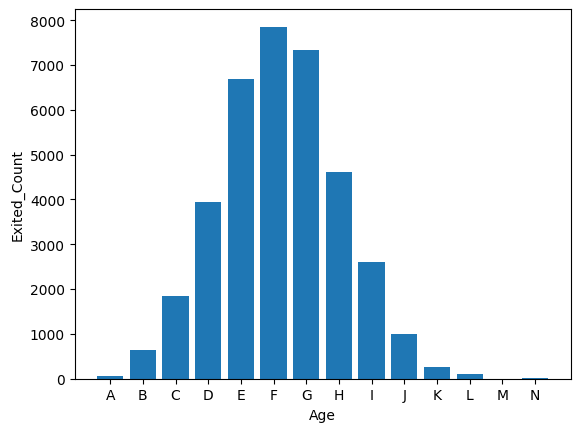

In [26]:
plt.bar(t1.index,exit.value_counts().sort_index())
plt.xlabel('Age')
plt.ylabel('Exited_Count')
plt.show

In [17]:
max(df1.creditscore)


850.0

<Axes: xlabel='isactivemember'>

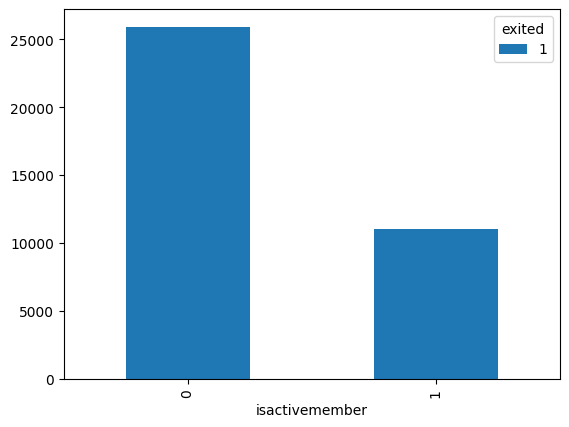

In [27]:
t2 = pd.crosstab(df.isactivemember,df1.exited)
t2.plot(kind='bar')


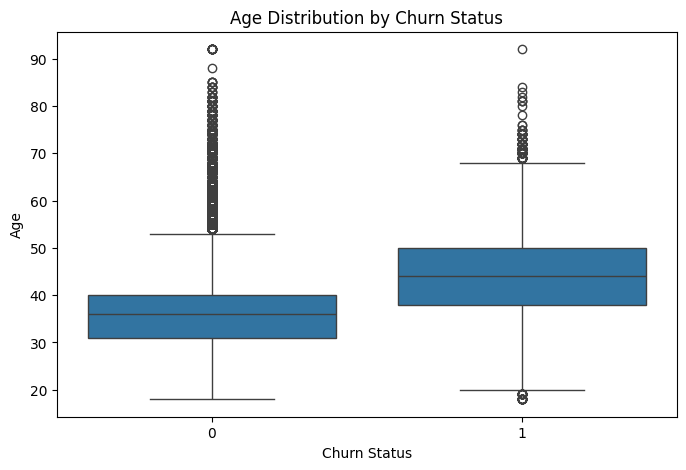

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='exited', y='age', data=df)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Age')
plt.show()

In [30]:
df['gender'] = np.where(df['male'] == 1, 'male', 'female')

print("\nDataFrame with new 'gender' column:")
print(df)


DataFrame with new 'gender' column:
        surname  creditscore   age  tenure    balance  numofproducts  \
0          2023        668.0  33.0     3.0       0.00            2.0   
1          2024        627.0  33.0     1.0       0.00            2.0   
2          1236        678.0  40.0    10.0       0.00            2.0   
3          1362        581.0  34.0     2.0  148882.54            1.0   
4           491        716.0  33.0     5.0       0.00            2.0   
...         ...          ...   ...     ...        ...            ...   
175023     2226        644.0  28.0     7.0  155060.41            1.0   
175024     2846        800.0  29.0     2.0       0.00            2.0   
175025     1999        771.0  39.0     5.0       0.00            2.0   
175026     1336        516.0  35.0    10.0   57369.61            1.0   
175027     1570        709.0  36.0     7.0       0.00            1.0   

        hascrcard  isactivemember  estimatedsalary  exited  ...  germany  \
0               1     

In [31]:
df = df.drop(columns=['male', 'female'])

In [32]:
df

,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,...,surname_tfidf_4,france,germany,spain,mem_no_products,cred_bal_sal,bal_sal,tenure_age,age_tenure_product,gender
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,6.694578e-06,1,0,0,0.0,0.000000,0.000000,0.090909,99.0,male
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1.663329e-06,1,0,0,2.0,0.000000,0.000000,0.030303,33.0,male
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1.506864e-02,1,0,0,0.0,0.000000,0.000000,0.250000,400.0,male
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1.607584e-02,1,0,0,1.0,1022.940581,1.760655,0.058824,68.0,male
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,1.848919e-06,0,0,1,2.0,0.000000,0.000000,0.151515,165.0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,...,-4.259289e-10,1,0,0,0.0,3422.225727,5.314015,0.250000,196.0,male
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,...,-4.198716e-10,1,0,0,0.0,0.000000,0.000000,0.068966,58.0,female
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,...,-4.198716e-10,1,0,0,0.0,0.000000,0.000000,0.128205,195.0,male
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,...,1.883437e-03,1,0,0,1.0,291.079505,0.564108,0.285714,350.0,male


<Axes: xlabel='gender'>

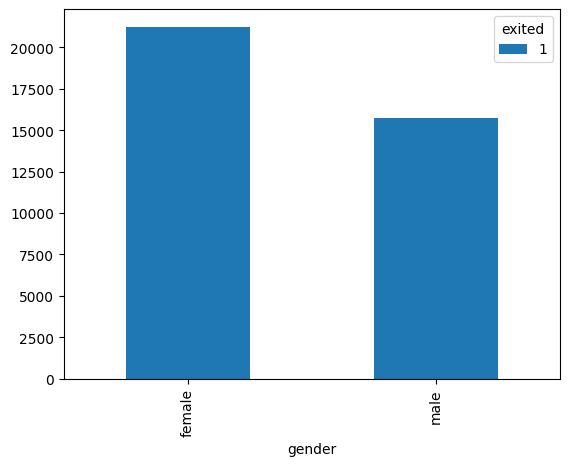

In [33]:
t3 = pd.crosstab(df.gender,df1.exited)
t3.plot(kind='bar')

In [36]:
country_columns = ['france', 'germany', 'spain']

df['geography'] = df[country_columns].idxmax(axis=1)

print("\nDataFrame with new 'geography' column:")
print(df)


DataFrame with new 'geography' column:
        surname  creditscore   age  tenure    balance  numofproducts  \
0          2023        668.0  33.0     3.0       0.00            2.0   
1          2024        627.0  33.0     1.0       0.00            2.0   
2          1236        678.0  40.0    10.0       0.00            2.0   
3          1362        581.0  34.0     2.0  148882.54            1.0   
4           491        716.0  33.0     5.0       0.00            2.0   
...         ...          ...   ...     ...        ...            ...   
175023     2226        644.0  28.0     7.0  155060.41            1.0   
175024     2846        800.0  29.0     2.0       0.00            2.0   
175025     1999        771.0  39.0     5.0       0.00            2.0   
175026     1336        516.0  35.0    10.0   57369.61            1.0   
175027     1570        709.0  36.0     7.0       0.00            1.0   

        hascrcard  isactivemember  estimatedsalary  exited  ...  germany  \
0               1  

In [37]:
df = df.drop(columns=country_columns)
df

,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,...,surname_tfidf_3,surname_tfidf_4,female,male,mem_no_products,cred_bal_sal,bal_sal,tenure_age,age_tenure_product,geography
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,-6.116396e-06,6.694578e-06,0,1,0.0,0.000000,0.000000,0.090909,99.0,france
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,7.812514e-06,1.663329e-06,0,1,2.0,0.000000,0.000000,0.030303,33.0,france
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,-9.387155e-03,1.506864e-02,0,1,0.0,0.000000,0.000000,0.250000,400.0,france
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,8.463003e-04,1.607584e-02,0,1,1.0,1022.940581,1.760655,0.058824,68.0,france
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,-1.568877e-06,1.848919e-06,0,1,2.0,0.000000,0.000000,0.151515,165.0,spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,...,-1.177945e-10,-4.259289e-10,0,1,0.0,3422.225727,5.314015,0.250000,196.0,france
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,...,-5.834499e-10,-4.198716e-10,1,0,0.0,0.000000,0.000000,0.068966,58.0,france
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,...,-5.834499e-10,-4.198716e-10,0,1,0.0,0.000000,0.000000,0.128205,195.0,france
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,...,-7.042491e-04,1.883437e-03,0,1,1.0,291.079505,0.564108,0.285714,350.0,france


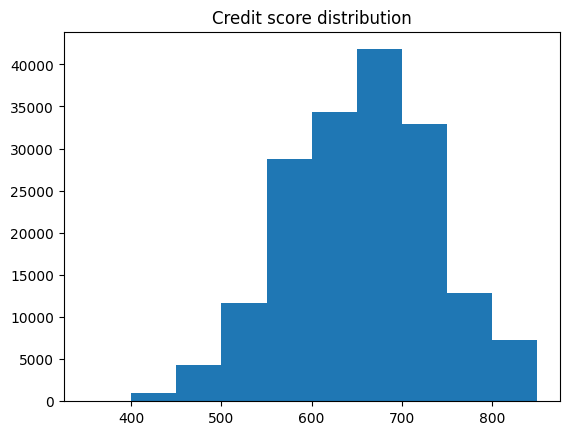

In [38]:
plt.hist(df.creditscore)
plt.title("Credit score distribution")
plt.show()

In [39]:
import scipy
from scipy import stats
from scipy.stats import skew,kurtosis

In [40]:
skew(df.creditscore)

np.float64(-0.06597172408180857)

In [41]:
skew(df.age)

np.float64(0.9798586828203835)

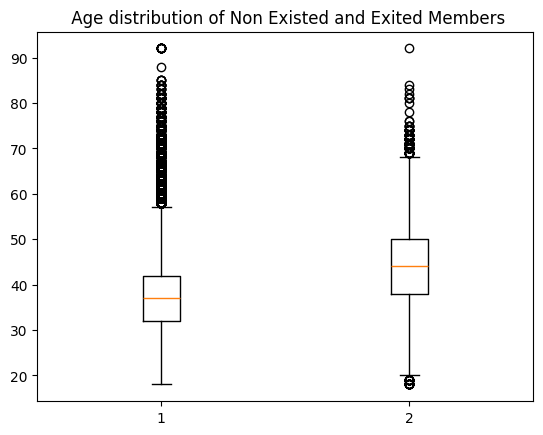

In [42]:
plt.boxplot([df.age,df1.age])
plt.title(" Age distribution of Non Existed and Exited Members")
plt.show()

In [43]:
mydf = df[['geography','exited']]
mydf

,geography,exited
0,france,0
1,france,0
2,france,0
3,france,0
4,spain,0
...,...,...
175023,france,0
175024,france,0
175025,france,0
175026,france,0


In [45]:
mydf_pivot= mydf.pivot_table(index='geography', columns='exited', aggfunc='size')
mydf_pivot

exited,0,1
geography,,
france,82843,16382
germany,23187,13927
spain,32041,6648


Text(0.5, 1.0, 'no. of exited members in each country')

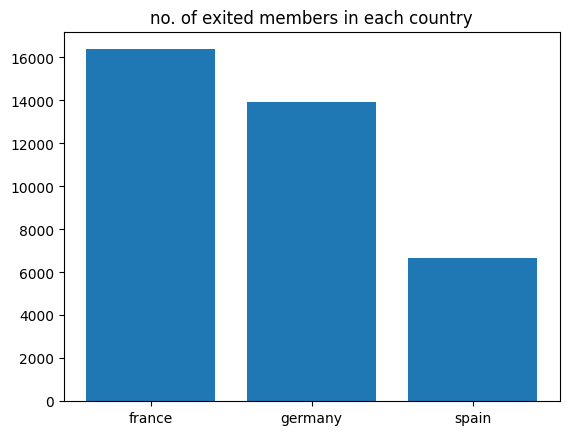

In [49]:
plt.bar(df1.geography.value_counts().index,df1.geography.value_counts())
plt.title('no. of exited members in each country')

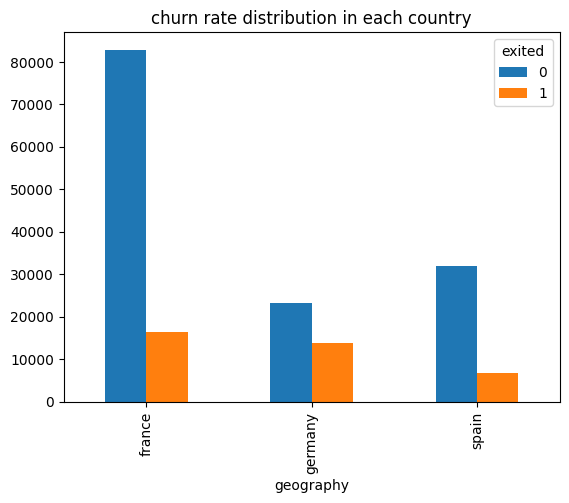

In [50]:
mydf_pivot.plot(kind='bar')
plt.title('churn rate distribution in each country')
plt.show()

### germany has higher churn rate

In [60]:
df.columns

Index(['surname', 'creditscore', 'age', 'tenure', 'balance', 'numofproducts',
       'hascrcard', 'isactivemember', 'estimatedsalary', 'exited',
       'surname_tfidf_0', 'surname_tfidf_1', 'surname_tfidf_2',
       'surname_tfidf_3', 'surname_tfidf_4', 'mem_no_products', 'cred_bal_sal',
       'bal_sal', 'tenure_age', 'age_tenure_product', 'gender', 'geography'],
      dtype='object')

In [52]:
df_heat= pd.read_csv('dataset', skiprows=skip_rows, header=None)
df_heat.columns=[
    'surname', 'creditscore', 'age', 'tenure', 'balance', 'numofproducts',
    'hascrcard', 'isactivemember', 'estimatedsalary', 'exited',
    'surname_tfidf_0', 'surname_tfidf_1', 'surname_tfidf_2', 'surname_tfidf_3',
    'surname_tfidf_4', 'france', 'germany', 'spain', 'female', 'male',
    'mem_no_products', 'cred_bal_sal', 'bal_sal', 'tenure_age',
    'age_tenure_product'
]
df_heat.drop(['surname','surname_tfidf_0', 'surname_tfidf_1', 'surname_tfidf_2', 'surname_tfidf_3','surname_tfidf_4'],axis=1,inplace=True)

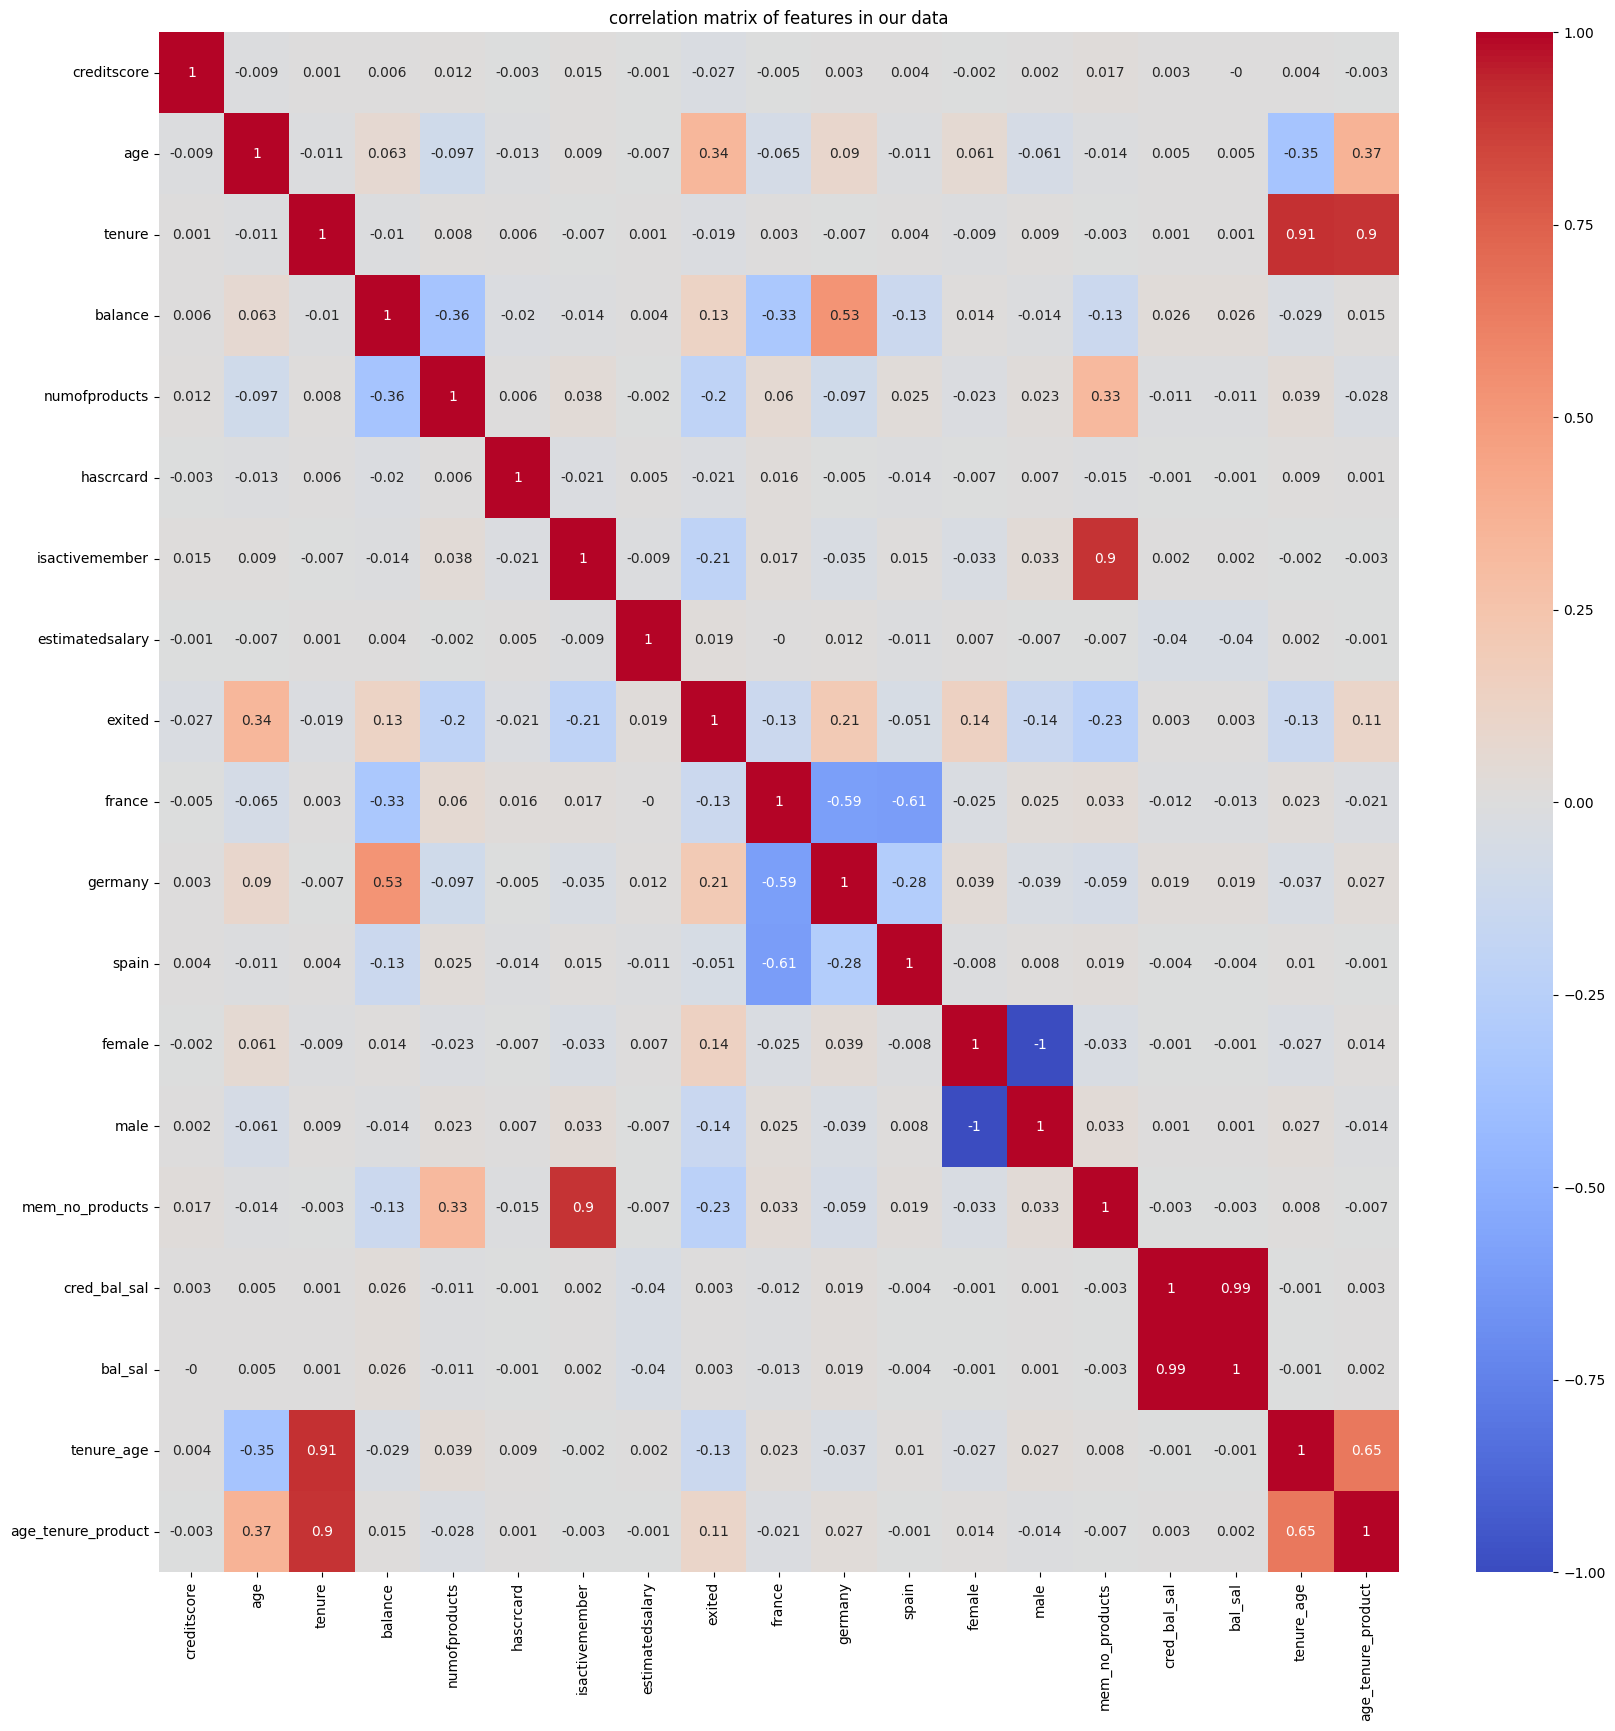

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(df_heat.corr().round(3),annot=True,cmap='coolwarm')
plt.title('correlation matrix of features in our data')
plt.show()